<a href="https://colab.research.google.com/github/Arvinzaheri/data_colab_task/blob/main/Data_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#firt of all we load the data frpm the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/booksummaries.txt"

In [ ]:
#https://drive.google.com/file/d/1PDujXAkSelYQ8KX_vBGwDr6EkMhJXlA3/view?usp=share_link
!gdown 1PDujXAkSelYQ8KX_vBGwDr6EkMhJXlA3

Downloading...
From: https://drive.google.com/uc?id=1PDujXAkSelYQ8KX_vBGwDr6EkMhJXlA3
To: /content/booksummaries.txt
100% 43.5M/43.5M [00:00<00:00, 76.4MB/s]


# Data Analysis and Cleaning

## Problem Identification
Upon initial inspection of the dataset, we identified several issues that could hinder our data analysis process. The data was in a text file with inconsistent separators, sometimes a space, sometimes a tab, and other times different characters. Additionally, the dataset did not have column names, making it difficult to understand the context of the data. There were also various symbols and additional characters like `:::::` instead of a single `:`.

## Solution
To address these issues, we decided to use Python's `pandas` library to convert the text file into a DataFrame, a two-dimensional tabular data structure with labeled axes (rows and columns). We also used Python's `re` (regular expression) module to clean the data.

### Data Loading
We read the file line by line, splitting each line into columns based on the separators (space or tab). This gave us a list of columns for each line, which we appended to our data list.

### Data Cleaning
We created a `clean_data` function that uses regular expressions to remove unwanted characters from the text. Specifically, we wrote a regex pattern to match any character that is not a letter, a number, or a space, and replaced these characters with nothing (effectively removing them).

```python
def clean_data(text):
    # Keep only alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


### Separator Inconsistency
One of the challenges we faced was the inconsistency in the separators used in the data. In some instances, a space was used, in others, a tab, and sometimes different characters altogether. This inconsistency made it difficult to correctly split the data into separate fields.

### Handling Separator Inconsistency
To handle this, we used Python's `re` (regular expression) module, which provides flexible pattern-matching capabilities. We used the `re.split()` function to split each line into columns. This function allows us to specify multiple separators by placing them inside a character class in the regex pattern. In our case, we used `\t|  `, which matches either a tab (`\t`) or two spaces (`  `).

Here's the relevant part of the code:

```python
# Split the line into columns
columns = re.split(r'\t|  ', line)



In [82]:
import pandas as pd
import re

# Define a function to clean the data
def clean_data(text):
    # Keep only alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


# Read the file
with open(path, 'r') as file:
    lines = file.readlines()

# Split the lines into columns and clean the data
data = []
for line in lines:
    # Split the line into columns
    columns = re.split(r'\t', line)
    # Clean the data
    columns = [clean_data(column) for column in columns]
    data.append(columns)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# If you want to add column names
df.columns = ['Id', 'Column2', 'Booktitle', 'Author', 'Year', 'Genre', "Summary"]


In [ ]:
df.head()

,Id,Column2,Booktitle,Author,Year,Genre,Summary
0,620,m0hhy,Animal Farm,George Orwell,19450817,m016lj8 Roman u00e0 clef m06nbt Satire m0dwly ...,Old Major the old boar on the Manor Farm call...
1,843,m0k36,A Clockwork Orange,Anthony Burgess,1962,m06n90 Science Fiction m0l67h Novella m014dfn ...,Alex a teenager living in nearfuture England ...
2,986,m0ldx,The Plague,Albert Camus,1947,m02m4t Existentialism m02xlf Fiction m0pym5 Ab...,The text of The Plague is divided into five p...
3,1756,m0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,m0wkt,A Fire Upon the Deep,Vernor Vinge,,m03lrw Hard science fiction m06n90 Science Fic...,The novel posits that space around the Milky ...


### Genre Cleaning
The genre column in our data contained encoded identifiers along with the actual genre names. These identifiers were not meaningful for our analysis and made the data harder to understand.

### Handling Genre Cleaning
To clean the genre column, we created a `clean_genre` function that uses regular expressions to remove these identifiers and keep only the genre names. The function removes any character that is not a letter or a space, effectively keeping only words.

Here's the `clean_genre` function:

```python
def clean_genre(text):
    # Remove words that contain numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text


In [83]:
def clean_genre(text):
    # Remove words that contain numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text


df['Genre'] = df['Genre'].apply(clean_genre)


In [84]:
import numpy as np

# Replace empty strings with np.nan
df.replace("", np.nan, inplace=True)

In [ ]:
#lets check the nan values
df.isna().sum()

Id              0
Column2         0
Booktitle       0
Author       2382
Year         5610
Genre        3718
Summary         0
dtype: int64

In [ ]:
#we can drop Id, Column2, year and last summary columns
df.drop(columns=['Column2'],inplace=True)

In [ ]:
df.head()

,Id,Booktitle,Author,Year,Genre,Summary
0,620,Animal Farm,George Orwell,19450817,Roman clef Satire Childrens literature Sp...,Old Major the old boar on the Manor Farm call...
1,843,A Clockwork Orange,Anthony Burgess,1962,Science Fiction Novella Speculative fiction...,Alex a teenager living in nearfuture England ...
2,986,The Plague,Albert Camus,1947,Existentialism Fiction Absurdist fiction N...,The text of The Plague is divided into five p...
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,A Fire Upon the Deep,Vernor Vinge,NaN,Hard science fiction Science Fiction Specul...,The novel posits that space around the Milky ...


In [ ]:
df["Tokens"] = df["Summary"].str.split()
df["Summary_length"] = df["Tokens"].apply(len)

<Axes: ylabel='Frequency'>

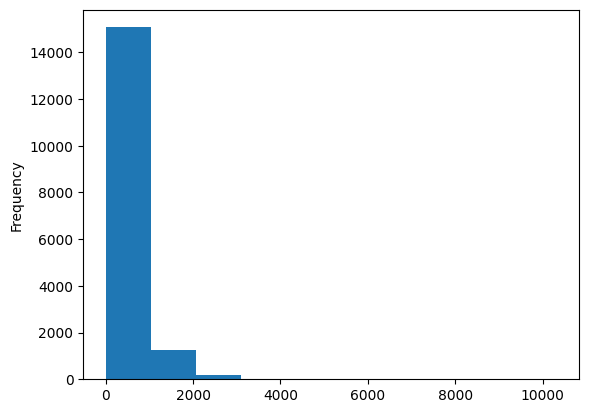

In [ ]:
df["Summary_length"].plot(kind="hist")


In [ ]:
max_summary_length = df["Summary_length"].max()
min_summary_length = df["Summary_length"].min()

print(f"Maximum summary length: {max_summary_length}")
print(f"Minimum summary length: {min_summary_length}")

Maximum summary length: 10317
Minimum summary length: 1


In [ ]:
#we convert summaries with less than 10 words to nan
df.loc[df["Summary_length"] < 10, "Summary"] = np.nan

In [ ]:
df.isna().sum()

Id                   0
Booktitle            0
Author            2382
Year              5610
Genre             3718
Summary             63
Tokens               0
Summary_length       0
dtype: int64

#Missing values

we have missing values in the summary and genre column.

### Handling Missing Values in Genre

The genre column in our data contained some missing values, represented as empty strings (""). Missing values can hinder our data analysis process, so it's important to handle them appropriately.

## Filling Missing Values

There are several strategies we can use to fill these missing values:

1. **Group by Author**: One approach is to group the data by the author, and fill the missing genre values based on the most common genre for each author. This assumes that an author typically writes in the same genre.

```python
# Fill missing values based on author's most common genre
df['Genre'] = df.groupby('Author')['Genre'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else ""))
```

2. **Use NLP Models**: If there are still a lot of missing values, we can use Natural Language Processing (NLP) models or Language Model (LM) to predict the genre based on other information, such as the book summary.

3. **Manual Filling**: If the number of missing values is small, we could also manually determine the missing values by researching the genre of the specific books.


In [ ]:
df.groupby('Author')['Genre'].value_counts()

Author         Genre                           
                                                   1596
                Science Fiction                     106
                Childrens literature                 74
                Novel                                61
                Fantasy                              48
                                                   ... 
mile Zola                                             1
                Short story                           1
                Psychological novel                   1
                Psychology  Psychological novel       1
sne Seierstad   Nonfiction                            1
Name: count, Length: 9638, dtype: int64

# Genre Searching Solution

after trying some simple solutions, I came up with this one.
we don't have any missing data in the Book_name column, so we can use it as a keyword
to search for the genre.


In [ ]:
#not working
import requests
from bs4 import BeautifulSoup

def get_book_genre(book_name):
    # Replace spaces with '+' for the URL
    book_name = book_name.replace(' ', '+')

    # Use Google to search for the book
    url = f"https://www.google.com/search?q={book_name}+book+genre"

    # Send a request to the website
    response = requests.get(url)

    # Parse the HTML content of the page with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    #print(soup.prettify())

    # Find the genre of the book
    genre_list = soup.find_all('div', {'class': 'BNeawe s3v9rd AP7Wnd'})

    # Extract the text from each genre element and store them in a list
    genres = [genre.get_text() for genre in genre_list if "Genre" in genre.get_text() or "Subject" in genre.get_text()]

    try:
      genres = genres[0]

      #the output is Genres: Allegory, Fable, Satire, and more we want the first tree genres in a list
      _, genres = genres.split(": ")
      genres = np.array(genres.split(" "))
      if len(genres) > 3:
          genres = genres[:3]
      else:
          pass
      return genres
    except:
      genres = [genre.get_text() for genre in genre_list]
      print(genres[0])
      print(book_name)
      return np.nan


book_name = "Hamlet"  # Example book
print(get_book_genre(book_name))
#the output is Genres: Allegory, Fable, Satire, and more we want the first tree genres in a list



['Tragedy' 'and' 'Drama']


In [ ]:
genre_missing_fill = df[df["Genre"].isna()].apply(lambda x: get_book_genre(x["Booktitle"]), axis=1)

In [ ]:
#actual solution
import requests

books_for_manual_search = []

def get_book_genre(book_name):
    # Replace spaces with '+' for the URL
    book_name = book_name.replace(' ', '+')

    # Use the Google Books API to search for the book
    url = f"https://www.googleapis.com/books/v1/volumes?q={book_name}"

    # Send a request to the API
    response = requests.get(url)

    # Convert the response to JSON
    data = response.json()

    # Get the first book from the results
    try:
      book = data['items'][0]
    except:
      print(book_name)
      books_for_manual_search.append(book_name)
      return np.nan

    # Get the genres (categories) of the book
    genres = book['volumeInfo'].get('categories', [])
    for trys in range(1, 4):
      try:
        book = data['items'][trys]
        genres = book['volumeInfo'].get('categories', [])
        if len(genres) > 0:
          break
      except:
        print(book_name)
        books_for_manual_search.append(book_name)
        return np.nan

    if len(genres) == 0:
      books_for_manual_search.append(book_name)
      return np.nan

    return np.array(genres[0])







book_name = "Hamlet"  # Example book
print(f"The genres of '{book_name}' are {get_book_genre(book_name)}")


The genres of 'Hamlet' are Drama


In [ ]:
def genre_finder(row):
    return get_book_genre(row['Booktitle'])

In [ ]:
fill = df[df['Genre'].isna()].apply(genre_finder, axis=1)

The+Psychopathic+God+Adolf+Hitler
The+Key


In [ ]:
books_for_manual_search

In [ ]:
df["Genre"].fillna(fill, inplace=True)

In [ ]:
df.isna().sum()

Id                   0
Booktitle            0
Author            2382
Year              5610
Genre              110
Summary             63
Tokens               0
Summary_length       0
dtype: int64

#Mising values in  Author column

**same solution as Genre column**

In [64]:
import requests

books_for_manual_search_author = []

def get_book_author(book_name):
    # Replace spaces with '+' for the URL
    book_name = book_name.replace(' ', '+')

    # Use the Google Books API to search for the book
    url = f"https://www.googleapis.com/books/v1/volumes?q={book_name}"

    # Send a request to the API
    response = requests.get(url)

    # Convert the response to JSON
    data = response.json()

    # Get the first book from the results
    try:
      book = data['items'][0]
    except:
      print(book_name)
      books_for_manual_search_author.append(book_name)
      return np.nan

    # Get the genres (categories) of the book
    genres = book['volumeInfo'].get('authors', [])
    for trys in range(1, 4):
      try:
        book = data['items'][trys]
        genres = book['volumeInfo'].get('authors', [])
        if len(genres) > 0:
          break
      except:
        print(book_name)
        books_for_manual_search_author.append(book_name)
        return np.nan

    if len(genres) == 0:
      books_for_manual_search_author.append(book_name)
      return np.nan

    return np.array(genres[0])







book_name = "Hamlet"  # Example book
print(f"The genres of '{book_name}' are {get_book_author(book_name)}")


The genres of 'Hamlet' are William Shakespeare


In [66]:
def author_finder(row):
    return get_book_author(row['Booktitle'])

In [67]:
author_missing_fill = df[df["Author"].isna()].apply(author_finder, axis=1)

Lacclrateur+atomique
UmreLahaasil+Ka+Haasil


In [ ]:
df["Author"].fillna(author_missing_fill, inplace=True)

In [71]:
df.to_csv('data.csv', index=False)

In [80]:
df.iloc[4760, 2] = "Lewis Trondheim"
df.iloc[16458, 2] = "Haider Qureshi"

#Mising values in Summary column

**Google api**

We could use google api to get missing values in summary column but
unlike Genre and Author there is no Summary section in the api result.
however there is a description section in the api result but it has no summary and often talks about the author and genre of the book.

**Wikipedia api**

this is a efficient solution for this problem. wkipedia api provides a summary function that can be used to get the summary of a book.
although finding a book title could be tricky. and there is a possibility that a book does not have a page on wikipedia.

**using llm**

this is the most accurate solution. we could use a light llm model (like PHI3) to get the summary of a book.
we could use the model knowledge base or build RAG system (with langchain or lamaindex) to get the summary of a book. the problem with this solution is that it is not efficient. because running an llm needs a lot of computing power

**manual**

at last we could manually get the summary of a book.

In [ ]:
#!pip install wikipedia
import wikipedia

#books_for_manual_search_summary = []

def wikipedia_summary(search_term):
    #book_name_on_wiki = wikipedia.search(search_term)[0]
    search_term_cleaned = search_term.replace(" ", "_")
    try:
        res = wikipedia.summary(search_term_cleaned)
    except wikipedia.exceptions.PageError:
      #books_for_manual_search_summary.append(search_term)
      res = np.nan
    except wikipedia.exceptions.DisambiguationError:
      #books_for_manual_search_summary.append(search_term)
      res = np.nan
    except wikipedia.exceptions.DisambiguationError as e:
        res = wikipedia.summary(e.options[0])

    return res

# Use the function like this:
summary = wikipedia_summary('bookofmicah')
print(summary)


The Book of Micah is the sixth of the twelve minor prophets in the Hebrew Bible. Ostensibly, it records the sayings of Micah, whose name is Mikayahu (Hebrew: מִיכָיָ֫הוּ), meaning "Who is like Yahweh?", an 8th-century BCE prophet from the village of Moresheth in Judah (Hebrew name from the opening verse: מיכה המרשתי).
The book has three major divisions, chapters 1–2, 3–5 and 6–7, each introduced by the word "Hear," with a pattern of alternating announcements of doom and expressions of hope within each division. Micah reproaches unjust leaders, defends the rights of the poor against the rich and powerful; while looking forward to a world at peace centered on Zion under the leadership of a new Davidic monarch.
While the book is relatively short, it includes lament (1.8–16; 7.8–10), theophany (1.3–4), hymnic prayer of petition and confidence (7.14–20), and the "covenant lawsuit" (6.1–8), a distinct genre in which Yahweh (God) sues Israel for breach of contract of the Mosaic covenant.


In [ ]:
fill_summary = df[df["Summary"].isna()].apply(lambda x: wikipedia_summary(x["Booktitle"]), axis=1)

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
df["Summary"].fillna(fill_summary, inplace=True)

In [ ]:
len(books_for_manual_search_summary)

32

In [ ]:
for book in books_for_manual_search_summary:
  res = wikipedia_summary(book.replace(" ", "_"))
  if res == np.nan:
    print(book)
  else:
    df.loc[df["Booktitle"] == book, "Summary"] = res

In [ ]:
df.isna().sum()

Id                   0
Booktitle            0
Author            2382
Year              5610
Genre             3718
Summary              4
Tokens               0
Summary_length       0
dtype: int64

In [ ]:
def filler(row):
  if row["Author"] != np.nan:
    try:
      res = wikipedia_summary(row["Book_title"] + " " + row["Author"])
    except:
      res = wikipedia_summary(row["Book_title"])
  else:
    res = wikipedia_summary(row["Book_title"])


In [ ]:
df[df["Summary"].isna()]

,Id,Booktitle,Author,Year,Genre,Summary,Tokens,Summary_length
4045,2832333,Deathstalker,Simon Green,NaN,Science Fiction Speculative fiction,NaN,"[62, 60]",2
10244,12124549,Angel Light,Andrew Greeley,199512,Speculative fiction Fantasy Fiction Romanc...,NaN,"[Plot, outline, description]",3
13810,22129357,Generation A,Douglas Coupland,NaN,Novel,NaN,"[Couplands, website, has, a, synopsis, of, the...",8
15958,31219389,Flame,NaN,NaN,NaN,NaN,[Characters],1


In [ ]:
#manually fill the missing summary
df.iloc[4045, 5] = "Owen Deathstalker, last of the infamous warrior Clan, always considered himself more of a writer than a fighter, preferring his history books to making any actual history with a sword. But books won’t protect him from Her Imperial Majesty Lionstone XIV, who just Outlawed and condemned Owen to death, without any explanation, reason, or warning. No wonder she’s called the Iron Bitch."

df.iloc[10244, 5] = "I do not want ten million dollars. I do not want to visit Ireland. I do not want to end a Tobin family feud. And, above all, I do not want to court my eighth cousin, once removed.Even as he says the words, Toby Tobin, Irish-American computer hacker, knows it's useless to resist. His late great-uncle's will must be obeyed, and his family is determined to make him respectable by his twenty-fifth birthday. Encouraged by a photo of his cousin, Sara Anne Elizabeth Tobin, with her gorgeous black hair, blue eyes, and pale skin, Toby checks his computer for travel arrangements to Ireland. He finds himself chatting with an unusual travel agent, Raphaella, a very modern angel, who's been surfing the net for someone to look after. Raphaella gives him a new passport and first-class plane tickets out of O'Hare, and the encouragement and good humor he'll need on his quest for a living grail--the beautiful, mysterious, troubled, young Sara Tobin. He must marry Sara within the month (and solve an ancient mystery and elude a threatening thug) in order to claim his inheritance. Angel Light is based on the Book of Tobis in the Old Testament, one of the sweetest love stories ever told."


df.iloc[13810, 5] = "Generation A is set in the near future in a world where bees are extinct, until five unconnected people all around the world— in the United States, Canada, France, New Zealand, and Sri Lanka—are all stung. Their shared experience unites them in ways they never could have imagined."
df.iloc[15958, 5] = "Two days after Levi and Charlotte spread her ashes in Notley Fern Gorge in northern Tasmania, Levi and Charlotte’s mother, Edith, returns from the dead, sprouting ferns and moss from her body. Her second life lasts four days: she spends the first two on the family’s farmland before walking to Levi and Charlotte’s father’s house and finally bursting into flames in his front yard. This kind of reincarnation happens to some women in the family after cremation. In the following weeks, Charlotte’s episodes of emotional distress disturb Levi. He resolves to build her a coffin to reassure her that she can avoid the trauma of reincarnation by being buried whole."


In [87]:
df.isna().sum()

Id             0
Booktitle      0
Author         0
Summary        0
Genre        110
dtype: int64

In [ ]:
#we could use distilbert model too to get the genre of the missing genres
#but we need to train the model on the text data so i think we need to use the summarizer model first then we can get the genre of the missing genres so we will do that on the NLP notebook

In [ ]:
#now we only need Genre and Summary columns so we save them as a .csv file
df.to_csv('Booksummaries.csv', index=False)

In [ ]:
#we upload the .csv file to the google drive
!cp Booksummaries.csv /content/drive/MyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
